<a href="https://colab.research.google.com/github/laxmikantG/AIMLProjects/blob/main/TimeSeries_BicycleCount_Seattle%E2%80%99s_Fremont_Bridge.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Time Series** - According to Wikipedia, A time series is a series of data points indexed (or listed or graphed) in time order. Most commonly, a time series is a sequence taken at successive equally spaced points in time. Thus it is a sequence of discrete-time data.

*Time series analysis accounts for the fact that data points taken over time may have an internal structure (such as autocorrelation, trend or seasonal variation) that should be accounted for.* [Time Series in details](https://www.itl.nist.gov/div898/handbook/pmc/section4/pmc4.htm)

As an example of working with some time series data, let’s take a look at bicycle counts on Seattle’s Fremont Bridge. This data comes from an automated bicycle counter, installed in late 2012, which has inductive sensors on the east and west sidewalks of the bridge. The hourly bicycle counts can be downloaded from [here](https://www.kaggle.com/city-of-seattle/seattle-fremont-bridge-hourly-bicycle-counts).



In [ ]:
# Let us import the dataset . Run this cell and upload the input dataset file
from google.colab import files
uploaded = files.upload()

Saving fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv to fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv


In [ ]:
import pandas as pd
data = pd.read_csv("fremont-bridge-hourly-bicycle-counts-by-month-october-2012-to-present.csv", index_col= 'Date', parse_dates=True)
data.head()

,Fremont Bridge Total,Fremont Bridge East Sidewalk,Fremont Bridge West Sidewalk
Date,,,
2012-10-03 00:00:00,13.0,4.0,9.0
2012-10-03 01:00:00,10.0,4.0,6.0
2012-10-03 02:00:00,2.0,1.0,1.0
2012-10-03 03:00:00,5.0,2.0,3.0
2012-10-03 04:00:00,7.0,6.0,1.0


For convenience, we’ll further process this dataset by shortening the column names and adding a “Total” column:



In [ ]:
data.columns = ["West", "East", "Sidewalk"]
data["Total"] = data["Sidewalk"] + data["East"] 


Let us describe the dataset, using `data.describe()`

In [ ]:
data.describe()

,West,East,Sidewalk,Total
count,62030.000000,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276,114.654732
std,145.686289,67.739036,90.417584,145.686289
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000,15.000000
50%,62.000000,29.000000,30.000000,62.000000
75%,150.000000,71.000000,74.000000,150.000000
max,1097.000000,698.000000,850.000000,1097.000000


Let us see, if there are any null values in the database and if any, let us drop them right away!

In [ ]:
data.dropna().describe()

,West,East,Sidewalk,Total
count,62030.000000,62030.000000,62030.000000,62030.000000
mean,114.654732,52.859455,61.795276,114.654732
std,145.686289,67.739036,90.417584,145.686289
min,0.000000,0.000000,0.000000,0.000000
25%,15.000000,7.000000,7.000000,15.000000
50%,62.000000,29.000000,30.000000,62.000000
75%,150.000000,71.000000,74.000000,150.000000
max,1097.000000,698.000000,850.000000,1097.000000


Looks like no null values!So we are ready to Visualize the data by plotting raw information

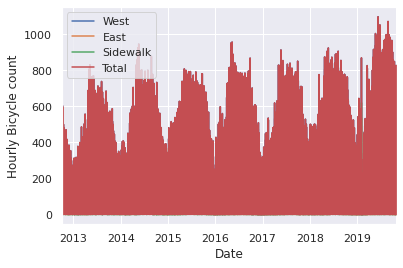

In [ ]:
import matplotlib.pyplot as plt
import seaborn
seaborn.set()

data.plot()
plt.ylabel("Hourly Bicycle count")
plt.show()

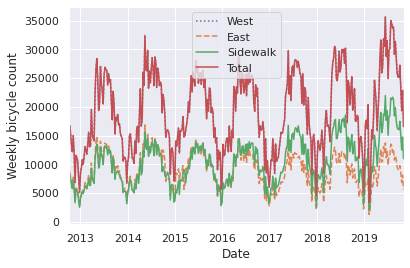

In [ ]:
# Let’s start by plotting the raw data:

weekly = data.resample("W").sum()
weekly.plot(style=[':', '--', '-'])
plt.ylabel('Weekly bicycle count')
plt.show()



This shows us some interesting seasonal trends: as you might expect, people bicycle more in the summer than in the winter, and even within a particular season the bicycle use varies from week to week.

Another way that comes in handy for aggregating the data is to use a rolling mean, utilizing the pd.rolling_mean() function. Here we’ll do a 30-day rolling mean of our data, making sure to center the window:



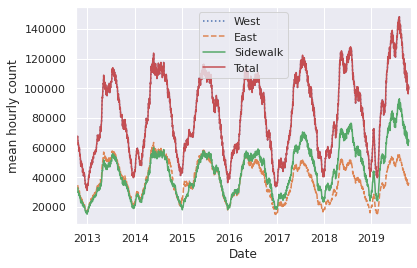

In [ ]:
daily = data.resample('D').sum()
daily.rolling(30, center=True).sum().plot(style=[':', '--', '-'])
plt.ylabel('mean hourly count')
plt.show()

The jaggedness of the result is due to the hard cutoff of the window. We can get a smoother version of a rolling mean using a window function—for example, a Gaussian window.



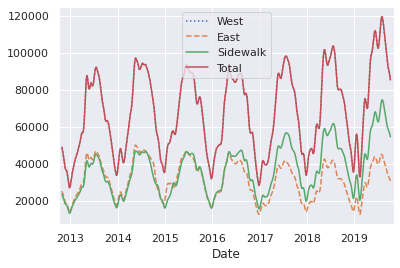

In [ ]:
daily.rolling(50, center=True,
              win_type='gaussian').sum(std=10).plot(style=[':','--', '-'])
plt.show()


**Digging into the data** 

---
While the smoothed data views are useful to get an idea of the 
general trend in the data, they hide much of the interesting structure. For example, we might want to look at the average traffic as a function of the time of day. We can do this using the GroupBy functionality:

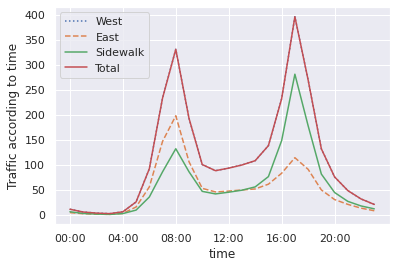

In [ ]:
import numpy as np
by_time = data.groupby(data.index.time).mean()
hourly_ticks = 4 * 60 * 60 * np.arange(6)
by_time.plot(xticks= hourly_ticks, style=[':', '--', '-'])
plt.ylabel("Traffic according to time")
plt.show()